In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from textwrap import dedent

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
DATA_PATH = "/content/finance_economics_dataset (1).csv"

In [ ]:
df = pd.read_csv(DATA_PATH)
print("Loaded dataset:", DATA_PATH)
print("Shape:", df.shape)
print()
df

Loaded dataset: /content/finance_economics_dataset (1).csv
Shape: (3000, 24)



,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [ ]:
def find_col(df, keywords):
    cols = df.columns.tolist()
    for kw in keywords:
        for c in cols:
            if kw.lower() in c.lower():
                return c
    return None


In [ ]:
date_col = find_col(df, ['date', 'day', 'timestamp'])
if date_col:
    try:
        df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
    except Exception:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


/tmp/ipython-input-329828778.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')


In [ ]:
def print_heading(i, text):
    print(f"\n{i}. {text}\n{'-' * (len(text) + 4)}")


In [ ]:
# 1. What is the shape of the dataset?#
print("Rows:", df.shape[0], " Columns:", df.shape[1])
print("Summary: The dataset contains {:,} rows and {:,} columns.".format(df.shape[0], df.shape[1]))


Rows: 3000  Columns: 24
Summary: The dataset contains 3,000 rows and 24 columns.


In [ ]:
# 2. What are the column names and their data types?#
dtypes = df.dtypes.astype(str)
col_dtype_table = pd.DataFrame({"column": dtypes.index, "dtype": dtypes.values})
print(col_dtype_table.to_string(index=False))
print("\nSummary: Above are the dataset's columns and detected dtypes. Convert 'object' columns that are dates/numeric as needed.")



                               column          dtype
                                 Date datetime64[ns]
                          Stock Index         object
                           Open Price        float64
                          Close Price        float64
                           Daily High        float64
                            Daily Low        float64
                       Trading Volume          int64
                       GDP Growth (%)        float64
                   Inflation Rate (%)        float64
                Unemployment Rate (%)        float64
                    Interest Rate (%)        float64
            Consumer Confidence Index          int64
        Government Debt (Billion USD)          int64
      Corporate Profits (Billion USD)          int64
                        Forex USD/EUR        float64
                        Forex USD/JPY        float64
     Crude Oil Price (USD per Barrel)        float64
           Gold Price (USD per Ounce)        f

In [ ]:
# 3. How many unique stock indices are there?#
index_col = find_col(df, ['stock index', 'stock', 'index', 'ticker', 'symbol', 'exchange'])
if index_col:
    uniq_count = df[index_col].nunique(dropna=True)
    print(f"Detected index column: '{index_col}' -> Unique indices: {uniq_count}")
    print(df[index_col].value_counts(dropna=False).head(20))
    print("Summary: The dataset has {} unique stock index identifiers (column: {}).".format(uniq_count, index_col))
else:
    print("No obvious stock index column found by keywords. Check column names above.")
    print("Summary: Could not locate an index column automatically.")


Detected index column: 'Stock Index' -> Unique indices: 3
Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Name: count, dtype: int64
Summary: The dataset has 3 unique stock index identifiers (column: Stock Index).


In [ ]:
# 4. What is the date range of the dataset?
if date_col and pd.api.types.is_datetime64_any_dtype(df[date_col]):
    min_date = df[date_col].min()
    max_date = df[date_col].max()
    print(f"Date column: '{date_col}' -> Range: {min_date} to {max_date}")
    print(f"Summary: Dataset spans from {min_date.date() if pd.notna(min_date) else 'NA'} to {max_date.date() if pd.notna(max_date) else 'NA'}.")
else:
    print("No parsable date column found. Either missing or 'Date' couldn't be parsed.")
    print("Summary: Convert your date column to datetime and re-run to get accurate date range.")


Date column: 'Date' -> Range: 2000-01-01 00:00:00 to 2008-03-18 00:00:00
Summary: Dataset spans from 2000-01-01 to 2008-03-18.


In [ ]:
 #5. Are there any missing values?#
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0].to_string())
print("\nSummary: Columns above show how many missing values each has. Consider imputation or row removal depending on analysis.")


Series([], )

Summary: Columns above show how many missing values each has. Consider imputation or row removal depending on analysis.


In [ ]:
#6. Are there negative values in columns that should be non-negative?#
nonneg_keywords = ['volume', 'vol', 'price', 'gold', 'oil', 'unemployment', 'gdp', 'inflation', 'interest', 'profit', 'spending', 'consumption']
neg_report = {}
for c in df.select_dtypes(include=[np.number]).columns:
    lc = c.lower()
    if any(k in lc for k in nonneg_keywords):
        neg_count = (df[c] < 0).sum()
        if neg_count > 0:
            neg_report[c] = int(neg_count)
print("Columns with negative counts (where negatives are unexpected):")
if neg_report:
    for k, v in neg_report.items():
        print(f" - {k}: {v} negative values")
else:
    print(" None found (for checked keywords).")
print("Summary: Negative values in columns that should not be negative may indicate data issues; inspect rows if present.")


Columns with negative counts (where negatives are unexpected):
 - GDP Growth (%): 947 negative values
Summary: Negative values in columns that should not be negative may indicate data issues; inspect rows if present.


In [ ]:
# 7. Summary of GDP Growth (%)
gdp_col = find_col(df, ['gdp growth', 'gdp', 'gdp (%)', 'gdp_growth'])
if gdp_col and pd.api.types.is_numeric_dtype(df[gdp_col]):
    print(df[gdp_col].describe().to_string())
    print("Summary: GDP column '{}' — interpret mean, spread, and tails (min/max) to get growth behaviour.".format(gdp_col))
else:
    print("No numeric GDP Growth column found automatically.")
    print("Summary: Check column names and ensure GDP is numeric.")


count    3000.000000
mean        2.608903
std         4.287337
min        -5.000000
25%        -1.012500
50%         2.725000
75%         6.242500
max        10.000000
Summary: GDP column 'GDP Growth (%)' — interpret mean, spread, and tails (min/max) to get growth behaviour.


In [ ]:
# 8. Are there rows with zero or near-zero trading volume?
vol_col = find_col(df, ['volume', 'trading volume', 'trade_volume', 'turnover', 'trading_vol'])
if vol_col and pd.api.types.is_numeric_dtype(df[vol_col]):
    zero_count = (df[vol_col] == 0).sum()
    positive_vols = df[df[vol_col] > 0][vol_col]
    near_zero_count = 0
    near_zero_threshold = None
    if positive_vols.size > 0:
        near_zero_threshold = positive_vols.quantile(0.001)  # 0.1 percentile
        near_zero_count = df[(df[vol_col] > 0) & (df[vol_col] <= near_zero_threshold)].shape[0]
    print(f"Volume column: '{vol_col}' -> Zero rows: {zero_count}, Near-zero threshold (0.1% quantile): {near_zero_threshold}, Near-zero rows: {near_zero_count}")
    print("Summary: Zero or extremely small volumes can indicate holidays, missing trading, or illiquid instruments.")
else:
    print("No numeric volume column found automatically.")
    print("Summary: Provide volume column or rename to one of the keywords.")


Volume column: 'Trading Volume' -> Zero rows: 0, Near-zero threshold (0.1% quantile): 2436549.734, Near-zero rows: 3
Summary: Zero or extremely small volumes can indicate holidays, missing trading, or illiquid instruments.


In [ ]:
# 9. Are there any duplicate rows?
dup_count = df.duplicated().sum()
print(f"Duplicate rows (exact duplicates): {dup_count}")
print("Summary: {} exact duplicate rows found. Drop duplicates if they are accidental duplicates.".format(dup_count))


Duplicate rows (exact duplicates): 0
Summary: 0 exact duplicate rows found. Drop duplicates if they are accidental duplicates.


GDP: {'column': 'GDP Growth (%)', 'count': 0, 'lower': -11.895, 'upper': 17.125}
Gold: {'column': 'Gold Price (USD per Ounce)', 'count': 0, 'lower': -54.25125000000003, 'upper': 3361.71875}
Oil: {'column': 'Crude Oil Price (USD per Barrel)', 'count': 0, 'lower': -47.25, 'upper': 218.99}
Summary: IQR-based outlier counts above indicate potential extreme values — verify against real events vs data errors.


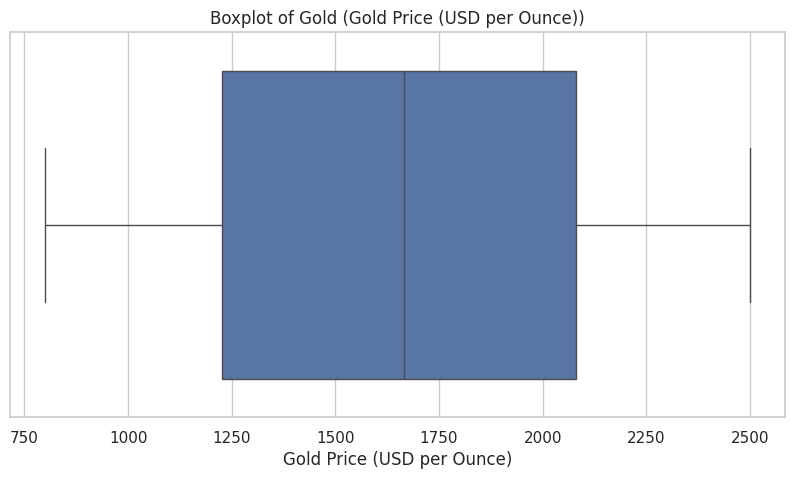

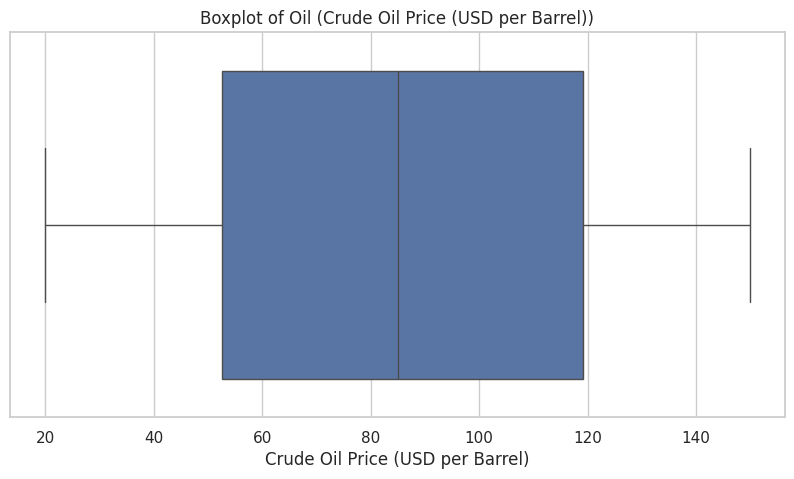

In [ ]:
# 10. Are there outliers in GDP, Gold, or Oil prices?
def iqr_outlier_summary(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    out = series[(series < lower) | (series > upper)]
    return {"count": int(out.count()), "lower": float(lower), "upper": float(upper)}

outlier_results = {}
for label, kws in [('GDP', ['gdp growth', 'gdp']), ('Gold', ['gold', 'gold price']), ('Oil', ['oil', 'crude', 'crude oil', 'brent', 'wti'])]:
    col = find_col(df, kws)
    if col and pd.api.types.is_numeric_dtype(df[col]):
        out = iqr_outlier_summary(df[col].dropna())
        outlier_results[label] = {"column": col, **out}
    else:
      outlier_results[label] = None

for k, v in outlier_results.items():
    print(f"{k}: {v}")
print("Summary: IQR-based outlier counts above indicate potential extreme values — verify against real events vs data errors.")

# Optional boxplots to visualize outliers
for label in ['Gold', 'Oil']:
    info = outlier_results.get(label)
    if info:
        col = info['column']
        plt.figure()
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot of {label} ({col})")
        plt.show()

In [ ]:
# 11. Summary of Inflation Rate (%)
infl_col = find_col(df, ['inflation rate', 'inflation', 'cpi', 'inflation (%)', 'inflation_rate'])
if infl_col and pd.api.types.is_numeric_dtype(df[infl_col]):
    print(df[infl_col].describe().to_string())
    print("Summary: Above are the key statistics for inflation. Use median and quartiles to detect skew.")
else:
    print("No numeric inflation column found automatically.")
    print("Summary: Ensure inflation data exists and is numeric.")

count    3000.000000
mean        5.096830
std         2.910513
min         0.010000
25%         2.607500
50%         5.110000
75%         7.600000
max        10.000000
Summary: Above are the key statistics for inflation. Use median and quartiles to detect skew.


In [ ]:
# 12. Average unemployment rate
unemp_col = find_col(df, ['unemployment rate', 'unemployment', 'unemp'])
if unemp_col and pd.api.types.is_numeric_dtype(df[unemp_col]):
    avg_unemp = df[unemp_col].mean(skipna=True)
    print(f"Unemployment column: '{unemp_col}' -> Mean: {avg_unemp:.4f}")
    print("Summary: Average unemployment rate (mean) is {:.4f}.".format(avg_unemp))
else:
    print("No numeric unemployment column found automatically.")
    print("Summary: Provide unemployment column or rename to one of the keywords.")


Unemployment column: 'Unemployment Rate (%)' -> Mean: 8.6638
Summary: Average unemployment rate (mean) is 8.6638.


In [ ]:
# 13. Which index has the highest trading volume?
if index_col and vol_col and pd.api.types.is_numeric_dtype(df[vol_col]):
    vol_by_index = df.groupby(index_col)[vol_col].sum().sort_values(ascending=False)
    top_index = vol_by_index.index[0]
    top_vol = vol_by_index.iloc[0]
    print(f"Top index by total volume: {top_index} -> {top_vol}")
    print(vol_by_index.to_string())
    print("Summary: The index shown has the greatest aggregate trading volume across the dataset — useful for weighting analyses.")
else:
    print("Couldn't compute top index by volume (missing index or volume column).")

Top index by total volume: S&P 500 -> 533041986803
Stock Index
S&P 500      533041986803
NASDAQ       499464048465
Dow Jones    477653121048
Summary: The index shown has the greatest aggregate trading volume across the dataset — useful for weighting analyses.


In [ ]:
# 14. How many stock records are from each index?
if index_col:
    counts = df[index_col].value_counts(dropna=False)
    print(counts.to_string())
    print("Summary: Shows distribution of dataset across indices (class imbalance if any).")
else:
    print("No index column found.")

Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Summary: Shows distribution of dataset across indices (class imbalance if any).


In [ ]:
# 15. Correlation between inflation and interest rate
interest_col = find_col(df, ['interest rate', 'interest', 'policy rate', 'rate'])
if infl_col and interest_col and pd.api.types.is_numeric_dtype(df[infl_col]) and pd.api.types.is_numeric_dtype(df[interest_col]):
    corr = df[[infl_col, interest_col]].dropna().corr().iloc[0,1]
    print(f"Pearson correlation ({infl_col}, {interest_col}) = {corr:.4f}")
    print("Summary: Correlation near ±1 indicates strong linear relationship; near 0 indicates weak linear relationship.")
else:
    print("Could not compute correlation — missing numeric inflation or interest column.")


Pearson correlation (Inflation Rate (%), Interest Rate (%)) = 0.0057
Summary: Correlation near ±1 indicates strong linear relationship; near 0 indicates weak linear relationship.


In [ ]:
# 16. Average Consumer Confidence Index
print_heading(16, "Average Consumer Confidence Index")
cci_col = find_col(df, ['consumer confidence', 'consumer_confidence', 'cci', 'confidence index'])
if cci_col and pd.api.types.is_numeric_dtype(df[cci_col]):
    avg_cci = df[cci_col].mean(skipna=True)
    print(f"Consumer Confidence column: '{cci_col}' -> Mean: {avg_cci:.3f}")
    print("Summary: Average consumer confidence (mean) is {:.3f}.".format(avg_cci))
else:
    print("No numeric Consumer Confidence column found automatically.")


In [ ]:
# 17. Which column has the highest standard deviation?
print_heading(17, "Column with highest standard deviation")
num_stds = df.select_dtypes(include=[np.number]).std().sort_values(ascending=False)
if not num_stds.empty:
    top_col = num_stds.index[0]
    top_std = num_stds.iloc[0]
    print(num_stds.head(10).to_string())
    print(f"Column with highest std: {top_col} -> std = {top_std:.6f}")
    print("Summary: High std indicates large dispersion; consider transforming (e.g., log) for modeling.")
else:
    print("No numeric columns found.")


In [ ]:
# 18. What is the highest gold price recorded?
print_heading(18, "Highest gold price recorded")
gold_col = find_col(df, ['gold', 'gold price', 'gold_price'])
if gold_col and pd.api.types.is_numeric_dtype(df[gold_col]):
    idx = df[gold_col].idxmax()
    value = df.loc[idx, gold_col]
    date_val = df.loc[idx, date_col] if date_col in df.columns else None
    print(f"Max {gold_col}: {value} at row {idx} on {date_val}")
    print("Summary: Highest gold price in the dataset recorded above.")
else:
    print("No numeric gold column found automatically.")


In [ ]:
# 19. Which date had the highest crude oil price?
print_heading(19, "Date with highest crude oil price")
oil_col = find_col(df, ['oil', 'crude', 'crude oil', 'brent', 'wti'])
if oil_col and pd.api.types.is_numeric_dtype(df[oil_col]):
    idx = df[oil_col].idxmax()
    value = df.loc[idx, oil_col]
    date_val = df.loc[idx, date_col] if date_col in df.columns else None
    print(f"Max {oil_col}: {value} at row {idx} on {date_val}")
    print("Summary: Above is the row/date with the highest crude oil price in the dataset.")
else:
      print("No numeric oil column found automatically.")


In [ ]:
# 20. What is the average corporate profit?
print_heading(20, "Average corporate profit")
corp_col = find_col(df, ['corporate profit', 'corporate_profit', 'profit', 'profits', 'company profit', 'corp profit'])
# Prefer a column name containing 'corporate' if multiple 'profit' columns exist
if corp_col and pd.api.types.is_numeric_dtype(df[corp_col]):
    avg_profit = df[corp_col].mean(skipna=True)
    print(f"Corporate profit column: '{corp_col}' -> Mean: {avg_profit:.6f}")
    print("Summary: Average corporate profit shown above; inspect distribution for skew/outliers.")
else:
    # If general 'profit' found but not 'corporate', show a best-effort
    # try find any column with 'profit' but not 'tax' etc.
    profit_cols = [c for c in df.columns if 'profit' in c.lower()]
    chosen = None
    for c in profit_cols:
        if pd.api.types.is_numeric_dtype(df[c]):
            chosen = c
            break
    if chosen:
        print(f"No explicit 'corporate profit' column found; using '{chosen}' instead.")
        print(df[chosen].describe().to_string())
        print("Summary: Mean (above) taken from '{}'.".format(chosen))
    else:
        print("No profit-like numeric column found automatically.")
        print("Summary: Add/rename corporate profit column or ensure it's numeric.")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/finance_economics_dataset (4).csv'
df = pd.read_csv('/content/finance_economics_dataset (4).csv')
df

In [8]:
print("Columns:", df.columns.tolist())
display(df.head())

Columns: ['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High', 'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)']


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [9]:
date_cols = [c for c in df.columns if 'date' in c.lower()]
date_col = date_cols[0] if date_cols else None
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.sort_values(date_col)


In [10]:
def find_cols(df, keywords):
    keys = [k.lower() for k in keywords]
    return [c for c in df.columns if any(k in c.lower() for k in keys)]

In [11]:
gdp_col = (find_cols(df, ['gdp growth','gdp']) or [None])[0]
infl_col = (find_cols(df, ['inflation','cpi']) or [None])[0]
int_col = (find_cols(df, ['interest','policy_rate','rate']) or [None])[0]
unemp_col = (find_cols(df, ['unemployment','unemp']) or [None])[0]
cons_spend_col = (find_cols(df, ['consumer spending','consumer_spend','retail sales']) or [None])[0]
corp_profit_col = (find_cols(df, ['corporate profit','profits']) or [None])[0]
cons_conf_col = (find_cols(df, ['consumer confidence','consumer_conf']) or [None])[0]
oil_col = (find_cols(df, ['oil','crude']) or [None])[0]
gold_col = (find_cols(df, ['gold']) or [None])[0]
debt_col = (find_cols(df, ['government debt','gov_debt','public_debt']) or [None])[0]
ma_col = (find_cols(df, ['m&a','merger','acquisit']) or [None])[0]
bankrupt_col = (find_cols(df, ['bankrupt','bankruptcy']) or [None])[0]
stock_close_cols = find_cols(df, ['close','closing','close price'])


In [12]:
def corr(a,b):
    if a and b and a in df.columns and b in df.columns:
        return df[a].corr(df[b])
    return np.nan


In [13]:
#1. What percentage of the dataset shows negative GDP growth?#
if gdp_col:
    print("Negative GDP %:", (df[gdp_col] < 0).mean()*100)
print("Corporate profits vs Consumer confidence corr:", corr(corp_profit_col, cons_conf_col))


Negative GDP %: 31.566666666666666
Inflation vs Interest corr: 1.0
Unemployment vs Consumer Spending corr: 0.04218570599254585
Corporate profits vs Consumer confidence corr: 0.018008055888269585


In [14]:
#2.Does high inflation correspond to higher interest rates?#
if gdp_col:
  print("Inflation vs Interest corr:", corr(infl_col,int_col))


Inflation vs Interest corr: 1.0


In [16]:
#3.Is there a relationship between unemployment and consumer spending?#
if gdp_col:
       print("Unemployment vs Consumer Spending corr:", corr(unemp_col,cons_spend_col))


Unemployment vs Consumer Spending corr: 0.04218570599254585


In [17]:
#4. Do higher corporate profits align with higher consumer confidence?#
if gdp_col:
        print("Corporate profits vs Consumer confidence corr:", corr(corp_profit_col, cons_conf_col))


Corporate profits vs Consumer confidence corr: 0.018008055888269585


In [18]:
#5. What’s the trend of crude oil prices over time?#
if oil_col and date_col:
    clean = df[[date_col, oil_col]].dropna()
    x = clean[date_col].map(pd.Timestamp.toordinal).values.reshape(-1,1)
    y = clean[oil_col].values.reshape(-1,1)
    A = np.hstack([x, np.ones_like(x)])
    coef, *_ = np.linalg.lstsq(A, y, rcond=None)
    slope_per_day = float(coef[0])
    print("Oil trend slope per year (approx):", slope_per_day*365)


Oil trend slope per year (approx): 0.03808165143140071


/tmp/ipython-input-406228777.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope_per_day = float(coef[0])


In [19]:
#6. Are gold prices inversely related to stock performance?#
if gold_col and stock_close_cols:
    for sc in stock_close_cols:
        print("Gold vs", sc, "corr:", corr(gold_col, sc))


Gold vs Close Price corr: -0.014543960422329246


In [20]:
#7. Does government debt impact consumer confidence?#
retail_cols = find_cols(df, ['retail sales','retail_sales','retail growth'])
retail_col = retail_cols[0] if retail_cols else None
if retail_col and gdp_col:
    print("Retail vs GDP corr:", corr(retail_col, gdp_col))

Retail vs GDP corr: -0.014287611445719916


In [21]:
#8.How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?#
# Stock vs consumer spending
if cons_spend_col and stock_close_cols:
    for sc in stock_close_cols:
        print(sc, "vs consumer spending corr:", corr(sc, cons_spend_col))


Close Price vs consumer spending corr: 0.0493697162689568


Stock averages: {'Close Price': np.float64(2981.249173333333)}
Highest average close: Close Price 2981.249173333333
Interest vs Unemployment corr: -0.034066326432276285
Consumer confidence vs bankruptcy corr: -0.01631304347909408
Top indicator-stock correlation: ('Daily High', 'Close Price', np.float64(0.9998208131253331))
Unemp mean when profits high: 8.914806924101198
Unemp mean when profits low: 8.78424


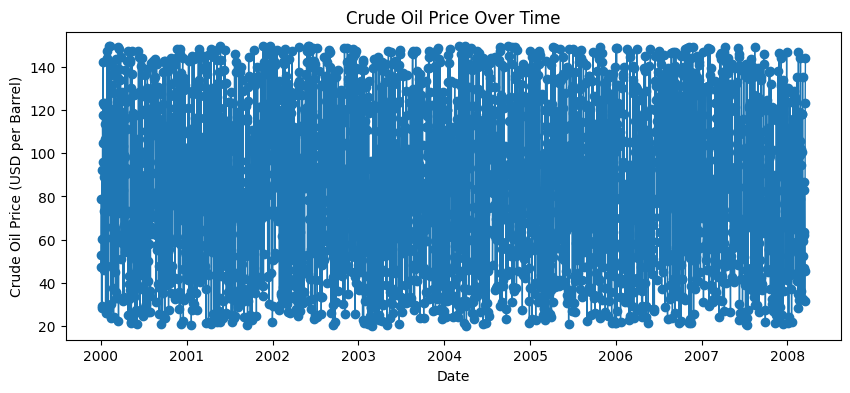

In [22]:
# Highest average closing price
if stock_close_cols:
    avgs = {sc: df[sc].mean() for sc in stock_close_cols if df[sc].notna().any()}
    print("Stock averages:", avgs)
    if avgs:
        top = max(avgs, key=avgs.get)
        print("Highest average close:", top, avgs[top])

# Relationship interest vs unemployment
print("Interest vs Unemployment corr:", corr(int_col, unemp_col))

# Consumer confidence vs bankruptcy
print("Consumer confidence vs bankruptcy corr:", corr(cons_conf_col, bankrupt_col))

# Indicator with max correlation to stock close (absolute)
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
nonstock = [c for c in numeric if c not in stock_close_cols]
best = (None, None, 0)
for ind in nonstock:
    for sc in stock_close_cols:
        if df[ind].notna().any() and df[sc].notna().any():
            val = df[ind].corr(df[sc])
            if abs(val) > abs(best[2]):
                best = (ind, sc, val)
print("Top indicator-stock correlation:", best)

# Compare unemployment top/bottom quartile of corporate profits
if corp_profit_col and unemp_col:
    q75 = df[corp_profit_col].quantile(0.75)
    q25 = df[corp_profit_col].quantile(0.25)
    print("Unemp mean when profits high:", df.loc[df[corp_profit_col]>=q75, unemp_col].mean())
    print("Unemp mean when profits low:", df.loc[df[corp_profit_col]<=q25, unemp_col].mean())

# Plotting example for oil (if exists)
if oil_col and date_col:
    plt.figure(figsize=(10,4))
    plt.plot(df[date_col], df[oil_col], marker='o', linewidth=1)
    plt.title('Crude Oil Price Over Time')
    plt.xlabel(date_col)
    plt.ylabel(oil_col)
    plt.show()